In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# #e28142 Our theme color hex code
# #c0c0c0 Silver hex code



In [39]:
df = pd.read_excel('Clean_Data.xlsx')

# We get 2 colums of index so we drop the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace = True)
df

,Price,Age,Floor,Number of Room,District,Area,Unit,District Socioeconomic Status
0,497075.000000,5,3,3,Mamak,113,m2,Low Level
1,619741.000000,7,5,6,Çankaya,154,m2,High Level
2,565145.000000,11,5,4,Çankaya,130,m2,High Level
3,593184.000000,7,5,4,Çankaya,128,m2,High Level
4,480906.000000,6,1,2,Mamak,80,m2,Low Level
...,...,...,...,...,...,...,...,...
155,580667.000000,8,5,4,Çankaya,116,m2,High Level
156,505701.000000,11,3,2,Keçiören,107,m2,Middle Level
157,481459.000000,7,3,3,Mamak,94,m2,Low Level
158,532142.000000,5,2,4,Keçiören,131,m2,Middle Level


In [40]:
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

In [41]:
# How do the price, area, and rooms of flats in Cankaya compare with those in the other districts?
# Firstly, let's check the price distribution of every district

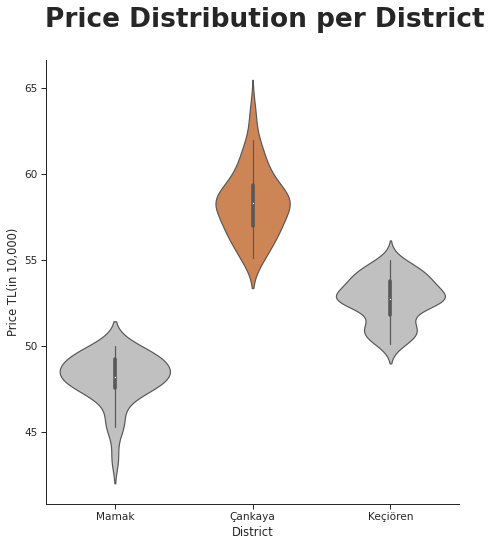

In [93]:
colors = {
    'Mamak': '#c0c0c0', 
    'Çankaya': '#e28142', 
    'Keçiören': '#c0c0c0'
}

g = sns.catplot(
    kind = 'violin', 
    data = df, 
    y = "Price",
    x = "District", 
    palette = colors, 
    height = 7
)
sns.set_context("paper", font_scale=1.2, rc={"font.size": 22,"axes.labelsize": 17}) 
sns.set_style('ticks')
g.fig.suptitle('Price Distribution per District', x = 0.59, y = 1.08, fontweight="bold")
g.set_titles('Axes titles {col_name}')
g.set(xlabel = 'District', ylabel = 'Price TL(in 10,000)', yticklabels = ['40','45','50','55','60','65'])
plt.show()

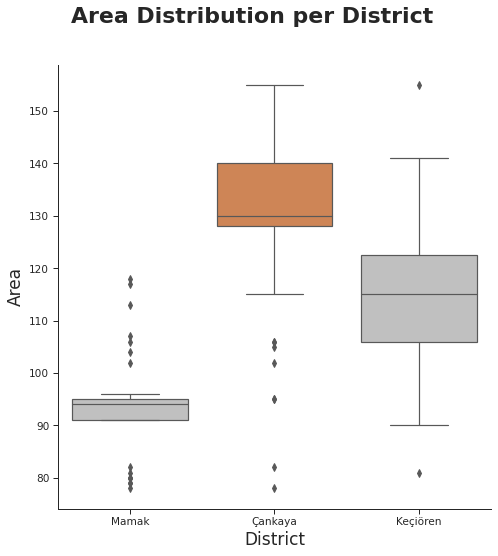

In [83]:
# Now let's compare the area of these flats

colors = {
    'Mamak': '#c0c0c0', 
    'Çankaya': '#e28142', 
    'Keçiören': '#c0c0c0'
}

g = sns.catplot(
    kind = 'box', 
    data = df, 
    y = "Area",
    x = "District", 
    palette = colors,
    height = 7
)
sns.set_context("paper", font_scale=1.2) 
sns.set_style('ticks')
plt.suptitle('Area Distribution per District', y = 1.09, fontsize = 22, fontweight="bold")
plt.xlabel('District', fontsize = 17)
plt.ylabel('Area', fontsize = 17)
plt.show()

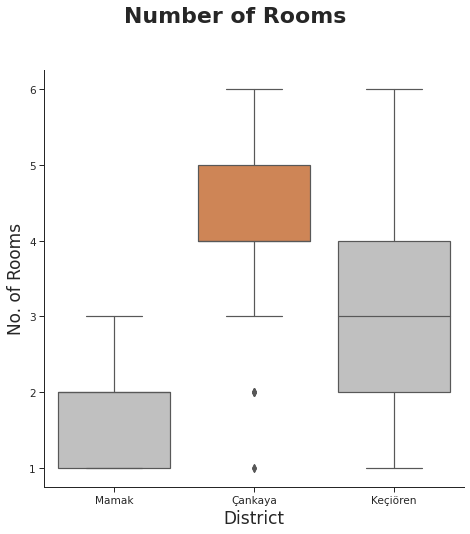

In [90]:
colors = {
    'Mamak': '#c0c0c0', 
    'Çankaya': '#e28142', 
    'Keçiören': '#c0c0c0'
}

g = sns.catplot(
    kind = 'box', 
    data = df, 
    y = "Number of Room",
    x = "District", 
    palette = colors,
    height = 7
)
sns.set_context("paper", font_scale=1.2) 
sns.set_style('ticks')
# plt.suptitle('Number of Rooms', y = 1.08, fontsize = 22, fontweight="bold")
g.fig.suptitle('Number of Rooms', y = 1.08, fontsize = 22, fontweight="bold")
plt.xlabel('District', fontsize = 17)
plt.ylabel('No. of Rooms', fontsize = 17)
plt.show()

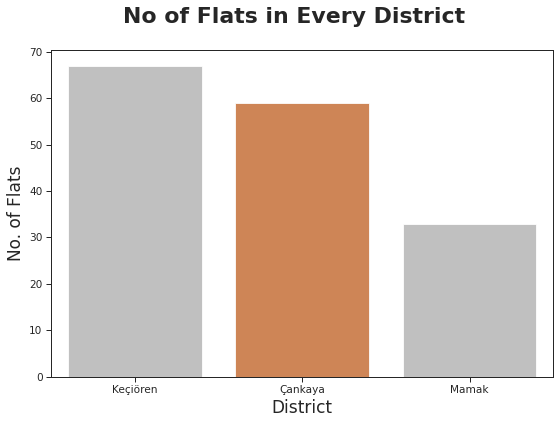

In [154]:
# Let's also compare the number of flats located in Cankaya in our dataset

colors = {
    'Mamak': '#c0c0c0', 
    'Çankaya': '#e28142', 
    'Keçiören': '#c0c0c0'
}
plt.figure(figsize = (9,6))
g = sns.countplot(
    data = df, 
    x = "District",
    palette = colors, 
    order = ['Keçiören', 'Çankaya', 'Mamak']
)
sns.set_context("paper", font_scale=1.2) 
sns.set_style('ticks')
plt.suptitle('No of Flats in Every District', fontsize = 22, fontweight="bold")
plt.xlabel('District', fontsize = 17)
plt.ylabel('No. of Flats', fontsize = 17)
plt.show()

# Maybe write the exact number on the bar

In [46]:
df.iloc[:,1:].groupby('District').agg(np.mean)

,Age,Floor,Number of Room,Area
District,,,,
Keçiören,8.223881,2.611940,3.014925,115.134328
Mamak,7.545455,1.969697,1.696970,93.575758
Çankaya,8.254237,4.101695,4.169492,129.796610


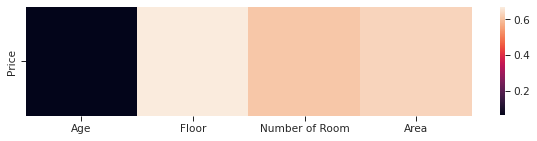

In [47]:
# Between the flats in all of the districts, which variable has the highest correlation with price?

corr_data = df.corr()

# We slice corr_data for the first row(price) and drop the correlation with itself(price column) which is 1
price_corr = corr_data.loc[['Price']].drop('Price', axis = 1)
plt.figure(figsize = (10,2)) # set the figure size 
sns.heatmap(price_corr)
plt.show()
# print(price_corr)


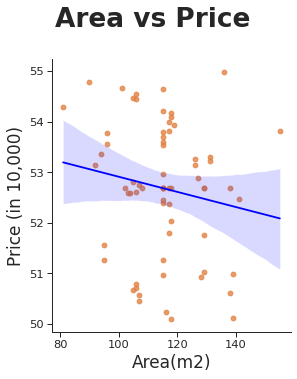

In [152]:
# How related is the prices and respective areas of flats in Kecioren?

sf = df.loc[df['District']=='Keçiören', :]

g = sns.lmplot(
    data = sf, 
    y = "Price",
    x = "Area", 
    line_kws={'color': 'blue'}, 
    scatter_kws={'color': '#e28142'}
)
sns.set_context("paper", font_scale=1.3, rc={"font.size": 22,"axes.labelsize": 17}) 
# choose context
# increase size
sns.set_style('ticks')
g.fig.suptitle('Area vs Price', x = 0.55, y = 1.08, fontweight="bold")
g.set(xlabel = 'Area(m2)', ylabel = 'Price (in 10,000)', yticklabels = ['','50','51','52','53','54','55'])

plt.show()

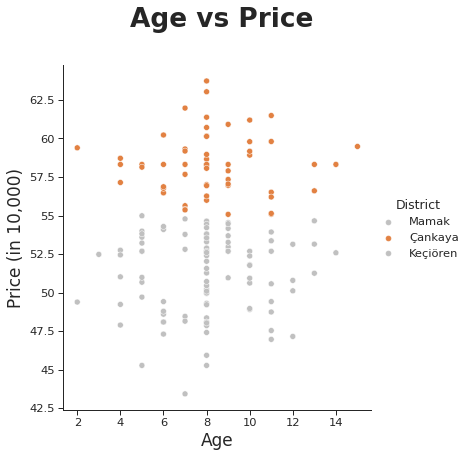

In [151]:
# Does the older a building get in Cankay increase its value?

g = sns.relplot(
    kind = 'scatter', 
    data = df, 
    y = "Price",
    x = "Age", 
    hue = "District", 
    s = 35, 
    height = 6, 
    palette = colors
)
sns.set_context("paper", font_scale=1.3, rc={"font.size": 22,"axes.labelsize": 17}) 
sns.set_style('ticks')
g.fig.suptitle('Age vs Price', x = 0.53, y = 1.08, fontweight="bold")
g.set_titles('Axes titles {col_name}')
g.set(xlabel = 'Age', ylabel = 'Price (in 10,000)', yticklabels = ['','42.5','45','47.5','50','52.5','55','57.5','60','62.5'])
# g.axes.set_xticks(range(10)) # <--- set the ticks first
# g.axes.set_xticklabels(['42.5','45','47.5','50','52.5','55','57.5','60','62.5','65'])
plt.show()


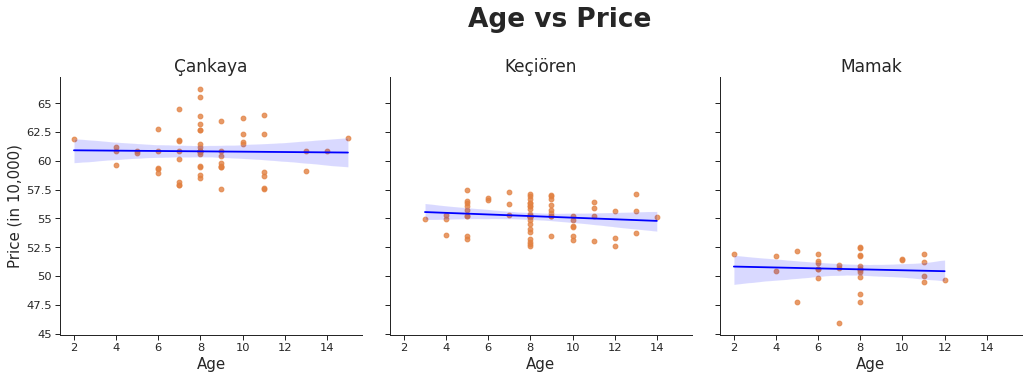

In [150]:
# Does the older a building get in Cankay increase its value? #2

g = sns.lmplot(
    data = df, 
    y = "Price",
    x = "Age", 
    col = "District", 
    col_order = ['Çankaya', 'Keçiören', 'Mamak'], 
    line_kws={'color': 'blue'}, 
    scatter_kws={'color': '#e28142'}
)
sns.set_context("paper", font_scale=1.3, rc={"font.size": 22,"axes.labelsize": 17}) 
# choose context
# increase size
sns.set_style('ticks')
g.fig.suptitle('Age vs Price', x = 0.55, y = 1.08, fontweight="bold")
g.set_titles('{col_name}')
g.set(xlabel = 'Age', ylabel = 'Price (in 10,000)', yticklabels = ['42.5','45','47.5','50','52.5','55','57.5','60','62.5','65'])

plt.show()

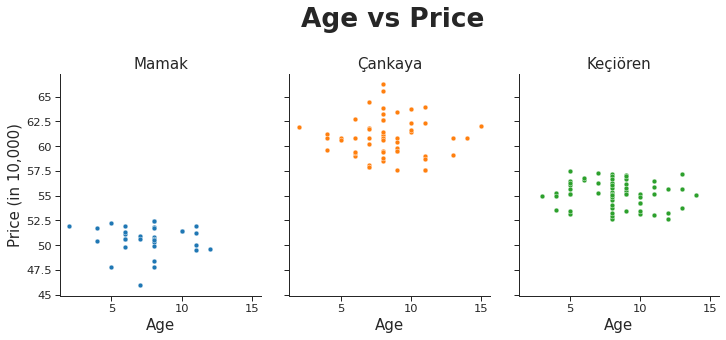

In [165]:
g = sns.FacetGrid(df, col="District", hue = "District", height=4.5, aspect=.80)
g.map(sns.scatterplot, "Age", "Price")
sns.set_style('ticks')
g.set_titles('{col_name}', fontsize = 22)
g.fig.suptitle('Age vs Price', x = 0.55, y = 1.08, fontweight="bold")
g.set(xlabel = 'Age', ylabel = 'Price (in 10,000)', yticklabels = ['42.5','45','47.5','50','52.5','55','57.5','60','62.5','65'])
sns.set_context("paper", font_scale=1.3, rc={"font.size": 22,"axes.labelsize": 15}) 

# sns.scatterplot(y="Price", x= "Age", data=df, ax=axes[0])
# sns.scatterplot(y="Price", x= "Age", data=df, ax=axes[1])
# sns.scatterplot(y="Price", x= "Age", data=df, ax=axes[2])

plt.show()

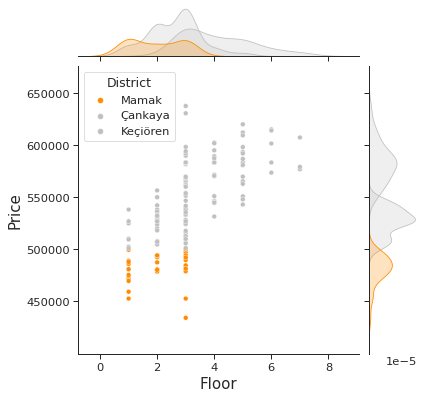

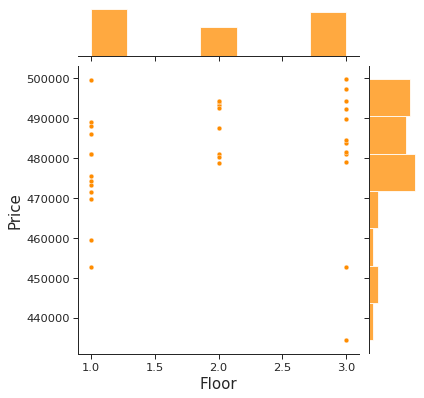

In [139]:
# Is the floor number of a flat a good indicator of the price for flats in mamak? Caompare it with the other districts.

sf = df.loc[df['District']=='Mamak', :]

# g = sns.lmplot(
#     data = sf, 
#     y = "Price",
#     x = "Floor", 
# )
# sns.set_context("paper", font_scale=1.3, rc={"font.size": 22,"axes.labelsize": 17}) 
# # choose context
# # increase size
# sns.set_style('ticks')
# g.fig.suptitle('Floor No. vs Price', x = 0.55, y = 1.08)
# g.set(xlabel = 'Floor No.', xticklabels = ['', '1', '', '2', '', '3'], ylabel = 'Price (in 10,000)', yticklabels = ['43','44','45','46','47','48','49','50'])



sns.set_style('ticks')
sns.jointplot(data=df,x="Floor",y="Price",hue="District", palette = ['darkorange','silver','silver'])
sns.jointplot(data = sf, x = "Floor", y = "Price", color = 'darkorange')

plt.show()


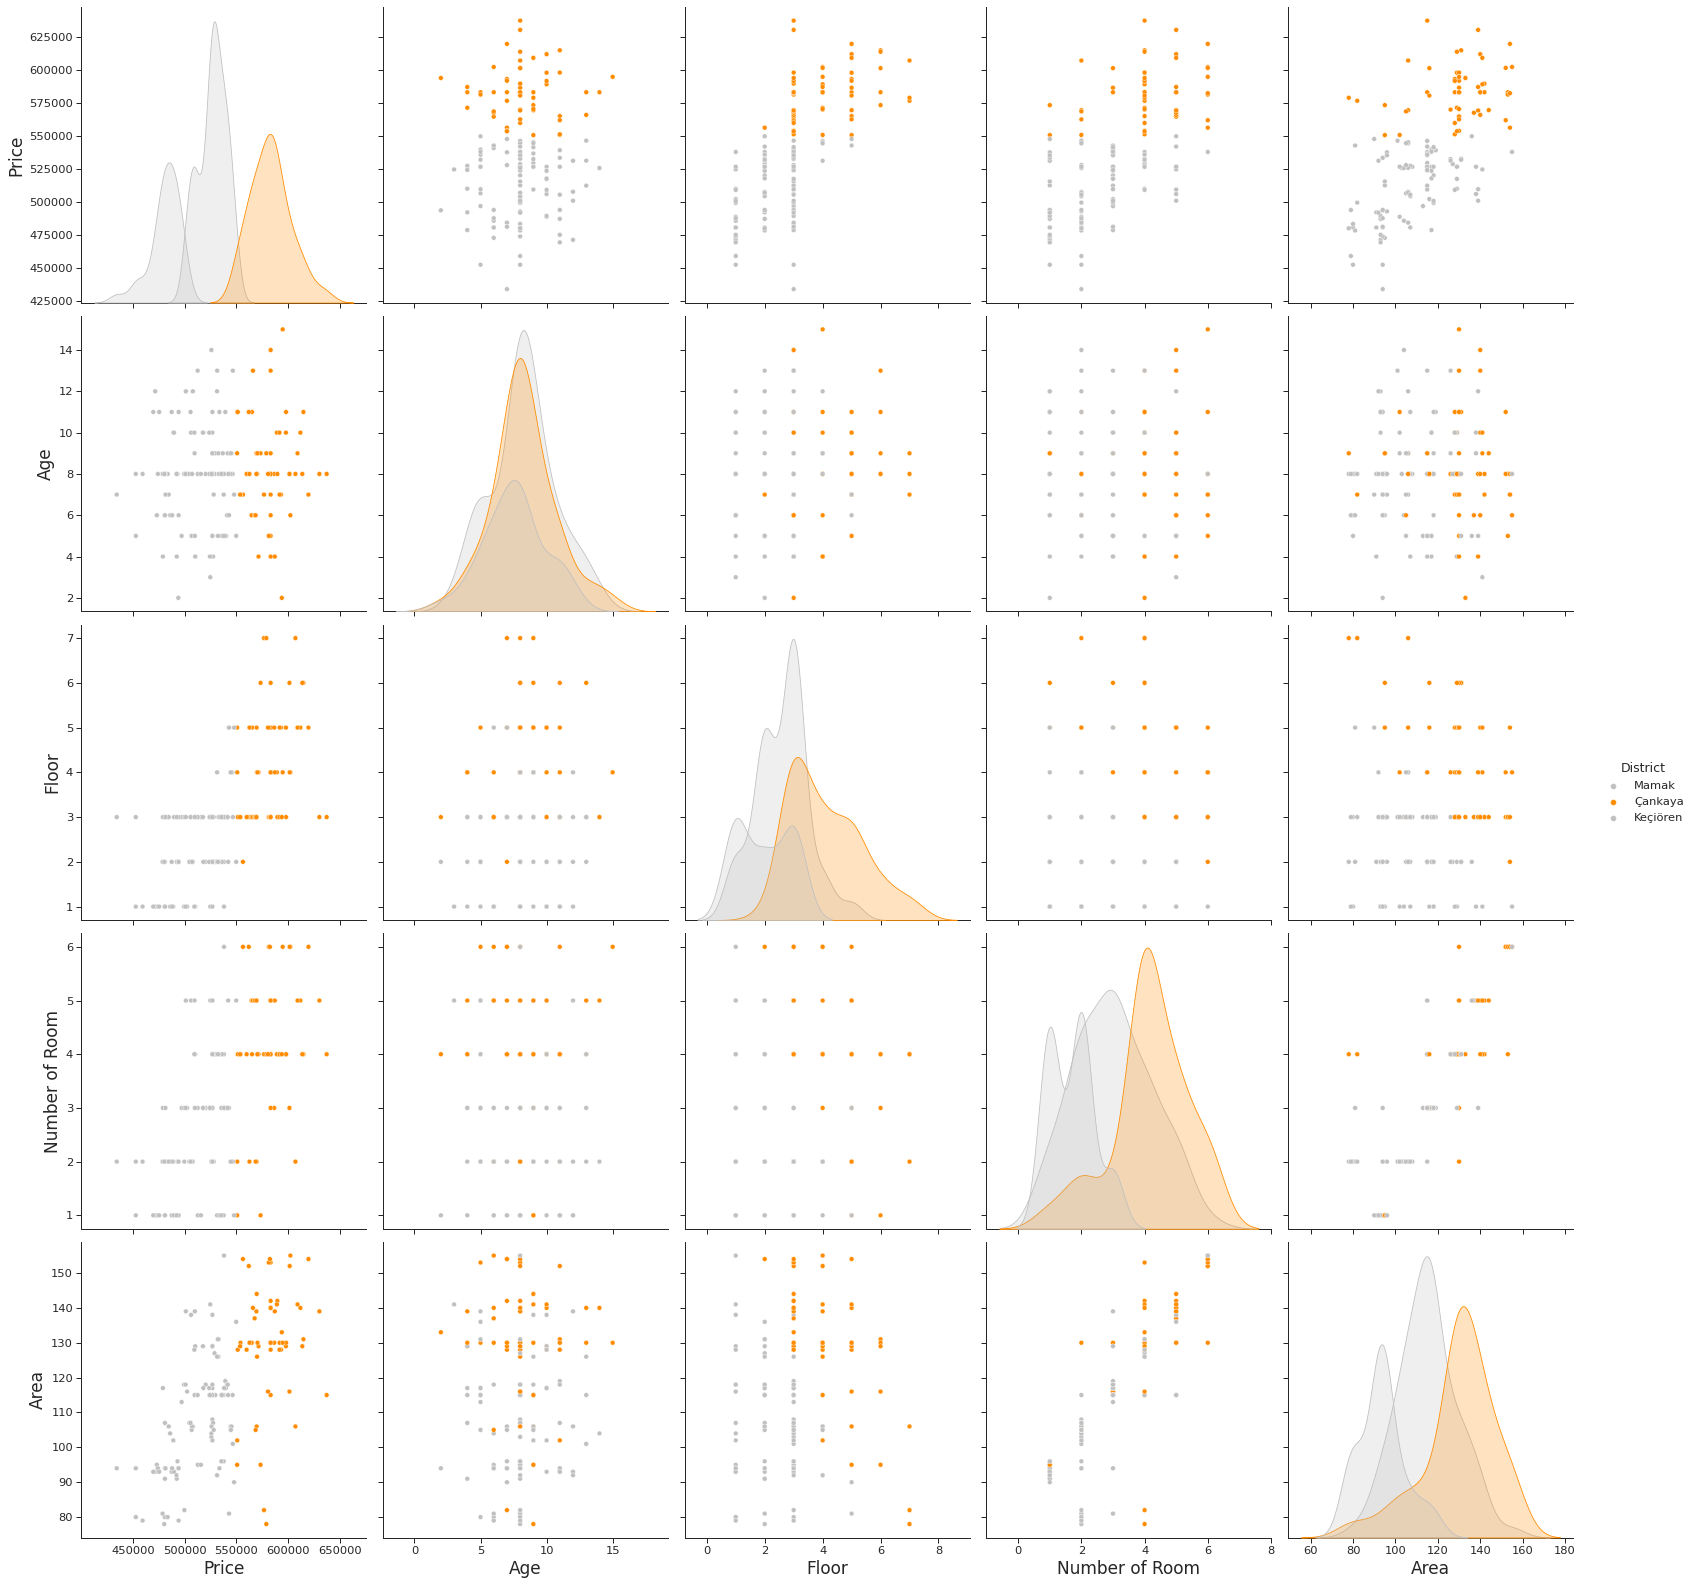

In [53]:
sns.pairplot(df, height=4.5, hue = 'District' , palette = ['silver','darkorange','silver'])

In [54]:
# Create a copy of df because were gonna get freaky with it

# cdf = df
# mcdf = cdf.set_index(["Age", "Floor", "Number of Room"])
# smcdf = mcdf.sort_index(level=["Age", "Floor", "Number of Room"])
# onlyindex = smcdf.drop(columns=["Price", "District", "Area", "Unit", "District Socioeconomic Status"])
# print(onlyindex.duplicated())

# Lesson learned when set as indexes they are not considered variables
# What is sig? sig is a column I created that store age, floor, no of rooms as one number of every flat. 

# These subsets are with area which should cut a whole lot of the df
# cdf = df[['Age', 'Floor', 'Number of Room', 'Area']]
# scdf = cdf.sort_values(["Age", "Floor", "Number of Room"])
# duplicates = df[cdf.duplicated(keep = False)]

# These subsets are without area
cdf = df[['Age', 'Floor', 'Number of Room']]
cdf['sig'] = cdf["Age"].astype(str) + cdf["Floor"].astype(str) + cdf["Number of Room"].astype(str)
cdf['sig'] = cdf['sig'].astype(int)
scdf = cdf.sort_values(["Age", "Floor", "Number of Room"])
df['sig'] = cdf['sig']
# duplicates = df[cdf.duplicated(keep = False)]

# There are 83 rows of duplicates, but most are within the same district so I'll find thos with different districts

duplicates = scdf[scdf['sig'].duplicated()]
print(cdf['sig'].duplicated().sum())
indii = set()
mt = pd.DataFrame()
a = set(duplicates['sig']) # a is the sig colum
a = list(a)
a = sorted(a)
cdf['District'] = df["District"]
s = pd.DataFrame()


for i in a:
  x = df[cdf['sig'] == i]
  if len(set(x["District"])) > 1: # To check if it it has different districts, we can use set
    means = x.groupby("District").agg(np.mean)
    means = means.reset_index()
    means = means.set_index('sig')
    means = means[['District', 'Price', 'Area', 'Age', 'Floor', 'Number of Room']]
    mt = pd.concat([mt, means])
    for index in x.index:
      indii.add(index)


print(mt)
# We have only one pair which have the exact characteristics but in different districts index(52, 98). The prices are almost the same. No difference observed.
# The others have prices very similar to their pairs except for the pair(50, 140). There is a 60k difference
# These have almost similar prices
# print(df[df["Area"] == 128])
# print(df.loc[[123, 98, 26, 79, 96, 140, 86, 116, 135]])

53
       District          Price        Area  Age  Floor  Number of Room
sig                                                                   
433.0  Keçiören  524452.000000  115.000000  4.0    3.0             3.0
433.0     Mamak  478934.000000  117.000000  4.0    3.0             3.0
533.0  Keçiören  529308.333333  124.333333  5.0    3.0             3.0
533.0     Mamak  497075.000000  113.000000  5.0    3.0             3.0
632.0     Mamak  494152.000000   79.000000  6.0    3.0             2.0
632.0   Çankaya  568677.000000  105.000000  6.0    3.0             2.0
732.0  Keçiören  528081.000000  105.000000  7.0    3.0             2.0
732.0     Mamak  459422.000000  100.000000  7.0    3.0             2.0
813.0  Keçiören  501663.500000  117.000000  8.0    1.0             3.0
813.0     Mamak  499478.000000  118.000000  8.0    1.0             3.0
822.0  Keçiören  505883.500000  106.500000  8.0    2.0             2.0
822.0     Mamak  483987.666667   85.000000  8.0    2.0             2.0
831

<ipython-input-54-0d925e2f3579>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['sig'] = cdf["Age"].astype(str) + cdf["Floor"].astype(str) + cdf["Number of Room"].astype(str)
<ipython-input-54-0d925e2f3579>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['sig'] = cdf['sig'].astype(int)
<ipython-input-54-0d925e2f3579>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [57]:
sims = df.loc[list(indii), :].sort_values(["Age", "Floor", "Number of Room"])
sims # matching flats But this table can't be visualized well

,Price,Age,Floor,Number of Room,District,Area,Unit,District Socioeconomic Status,sig
141,524452.000000,4,3,3,Keçiören,115,m2,Middle Level,433
118,478934.000000,4,3,3,Mamak,117,m2,Low Level,433
0,497075.000000,5,3,3,Mamak,113,m2,Low Level,533
138,509862.000000,5,3,3,Keçiören,139,m2,Middle Level,533
84,539898.000000,5,3,3,Keçiören,117,m2,Middle Level,533
123,538165.000000,5,3,3,Keçiören,117,m2,Middle Level,533
87,494152.000000,6,3,2,Mamak,79,m2,Low Level,632
100,568677.000000,6,3,2,Çankaya,105,m2,High Level,632
151,484551.000000,7,3,2,Mamak,106,m2,Low Level,732
153,528081.000000,7,3,2,Keçiören,105,m2,Middle Level,732


In [55]:
mt = mt.reset_index()

print(mt.pivot_table(values = "Price", index = "sig", aggfunc=np.diff))
print(mt)


              Price
sig                
433.0 -45518.000000
533.0 -32233.333333
632.0  74525.000000
732.0 -68659.000000
813.0  -2185.500000
822.0 -21895.833333
831.0 -48881.166667
832.0 -34583.307018
834.0  63819.303947
935.0  60051.000000
      sig  District          Price        Area  Age  Floor  Number of Room
0   433.0  Keçiören  524452.000000  115.000000  4.0    3.0             3.0
1   433.0     Mamak  478934.000000  117.000000  4.0    3.0             3.0
2   533.0  Keçiören  529308.333333  124.333333  5.0    3.0             3.0
3   533.0     Mamak  497075.000000  113.000000  5.0    3.0             3.0
4   632.0     Mamak  494152.000000   79.000000  6.0    3.0             2.0
5   632.0   Çankaya  568677.000000  105.000000  6.0    3.0             2.0
6   732.0  Keçiören  528081.000000  105.000000  7.0    3.0             2.0
7   732.0     Mamak  459422.000000  100.000000  7.0    3.0             2.0
8   813.0  Keçiören  501663.500000  117.000000  8.0    1.0             3.0
9   813.0 

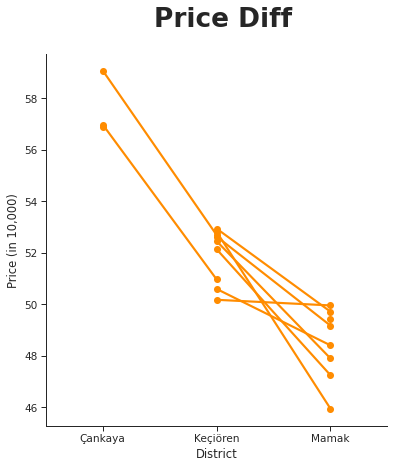

In [155]:
# Pointplot
g = sns.catplot(
    kind = 'point', 
    data = mt, 
    y = "Price", 
    x = "District",
    hue = 'sig', 
    order=['Çankaya', 'Keçiören', 'Mamak'], 
    palette = ['darkorange'],
    # We can make it colorful
    legend = False, 
    height = 6
)

sns.set_context("paper", font_scale=1.3, rc={"font.size": 22,"axes.labelsize": 17}) 
sns.set_style('ticks')
g.fig.suptitle('Price Diff', x = 0.59, y = 1.08, fontweight="bold")
g.set(xlabel = 'District', ylabel = 'Price (in 10,000)', yticklabels = ['','46','48','50','52','54','56','58','60'])
# g.axes.set_xticks(range(10)) # <--- set the ticks first
# g.axes.set_xticklabels(['42.5','45','47.5','50','52.5','55','57.5','60','62.5','65'])
plt.show()

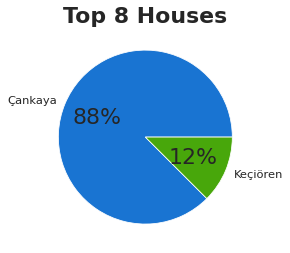

In [172]:
# Top 5% of 160 8. Let's order according to Area and slice the top 8 There are 3 152s. I will still take only first 1 of them
# print(df.sort_values('Area', ascending=False).loc[:,"District":"Area"].head(8))

top8 = df.sort_values('Area', ascending=False).head(8)

lbl = ['Çankaya', 'Keçiören']
plt.pie(top8['District'].value_counts(), labels=lbl, autopct='%.0f%%', colors = ['#1974D2', '#48A70B'])
plt.title("Top 8 Houses", fontsize = 22, fontweight='bold')

plt.show()